In [1]:
import argparse
import matplotlib.pyplot as plt
from logger.plotting import plot_episode_stats
from maac.logger.run_utils import setup_logger_kwargs

In [4]:
parser = argparse.ArgumentParser(description="Experimenting Actor-Attention-Critic")
parser.add_argument("--env_id", default="5", help="Name of environment")
parser.add_argument("--buffer_length", default=int(1e6), type=int)
parser.add_argument("--n_episodes", default=1, type=int)
parser.add_argument("--climate_zone", default=5, type=int)
parser.add_argument("--episode_length", default=1200, type=int)
parser.add_argument("--batch_size",
                    default=128, type=int,
                    help="Batch size for training")
parser.add_argument("--update_after", default=200)
parser.add_argument("--update_every", default=10, type=int)
parser.add_argument("--num_updates", default=1, type=int,
                    help="Number of updates per update cycle")
parser.add_argument("--exploration", default=300, type=int)
parser.add_argument("--exp_name", type=str, default="maac")
parser.add_argument("--seed", type=int, default=42)

config, unknown = parser.parse_known_args()

logger_kwargs = setup_logger_kwargs(config.exp_name, config.seed)

In [5]:
from main import run
env, stats = run(config, logger_kwargs=logger_kwargs)
# plot_episode_stats(stats)

Logging data to /Users/xiejiahan/PycharmProjects/CityLearn/data/maac/maac_s42/progress.txt
Saving config:

{
    "config":	{
        "Namespace(batch_size=128, buffer_length=1000000, climate_zone=5, env_id='5', episode_length=1200, exp_name='maac', exploration=300, n_episodes=1, num_updates=1, seed=42, update_after=200, update_every=10)":	{
            "batch_size":	128,
            "buffer_length":	1000000,
            "climate_zone":	5,
            "env_id":	"5",
            "episode_length":	1200,
            "exp_name":	"maac",
            "exploration":	300,
            "n_episodes":	1,
            "num_updates":	1,
            "seed":	42,
            "update_after":	200,
            "update_every":	10
        }
    },
    "exp_name":	"maac",
    "logger":	{
        "<logger.logx.EpochLogger object at 0x2aef2b550>":	{
            "epoch_dict":	{},
            "exp_name":	"maac",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
      

In [6]:
env.cost()

{'ramping': 1.4870702,
 '1-load_factor': 1.3780432676228456,
 'average_daily_peak': 1.1608851,
 'peak_demand': 1.6540492,
 'net_electricity_consumption': 1.0085275,
 'carbon_emissions': 1.0158253,
 'total': 1.2840667521780162,
 'coordination_score': 1.4200119310357315}

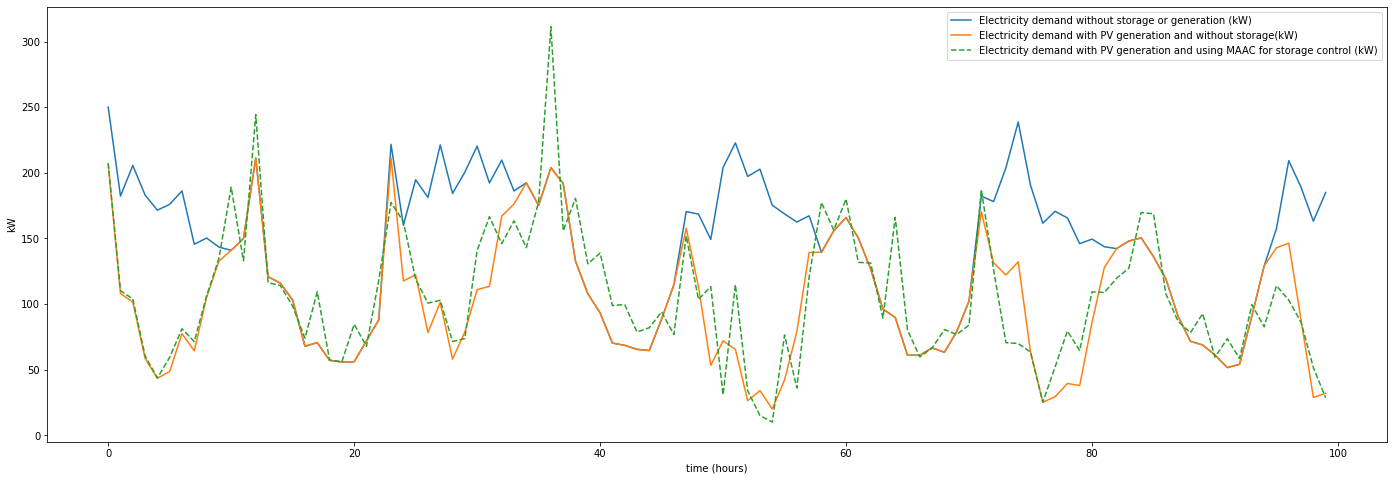

In [72]:
sim_period = (0, config.episode_length)
interval = range(800, 900)
plt.figure(figsize=(24, 8))
plt.plot(env.net_electric_consumption_no_pv_no_storage[interval])
plt.plot(env.net_electric_consumption_no_storage[interval])
plt.plot(env.net_electric_consumption[interval], '--')
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['Electricity demand without storage or generation (kW)',
            'Electricity demand with PV generation and without storage(kW)',
            'Electricity demand with PV generation and using MAAC for storage control (kW)'])

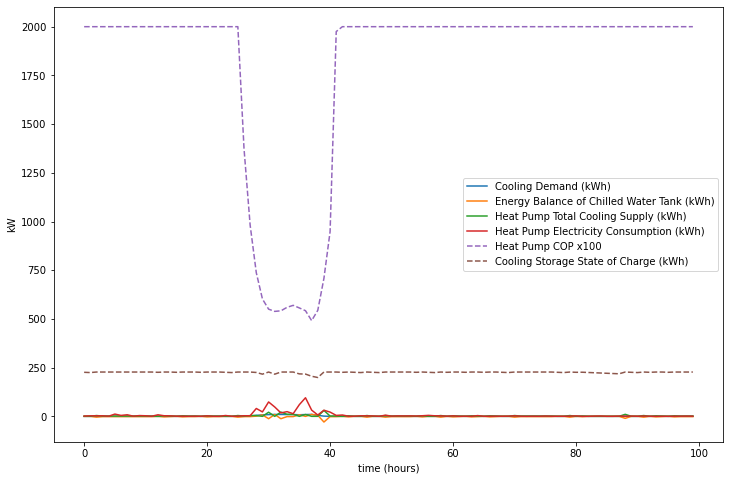

In [75]:
building_number = 'Building_2'
interval = range(24*30*3*0 + 8760*0 + 800,24*30*3*0 + 8760*0 + 900)
plt.figure(figsize=(12,8))
plt.plot(env.buildings[building_number].cooling_demand_building[interval])
plt.plot(env.buildings[building_number].cooling_storage_to_building[interval] - env.buildings[building_number].cooling_device_to_storage[interval])
plt.plot(env.buildings[building_number].cooling_device.cooling_supply[interval])
plt.plot(env.electric_consumption_cooling[interval])
plt.plot(env.buildings[building_number].cooling_device.cop_cooling[interval]*100,'--')
plt.plot(env.buildings[building_number].cooling_storage.soc[interval],'--')
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['Cooling Demand (kWh)',
            'Energy Balance of Chilled Water Tank (kWh)',
            'Heat Pump Total Cooling Supply (kWh)',
            'Heat Pump Electricity Consumption (kWh)',
            'Heat Pump COP x100',
            'Cooling Storage State of Charge (kWh)'])

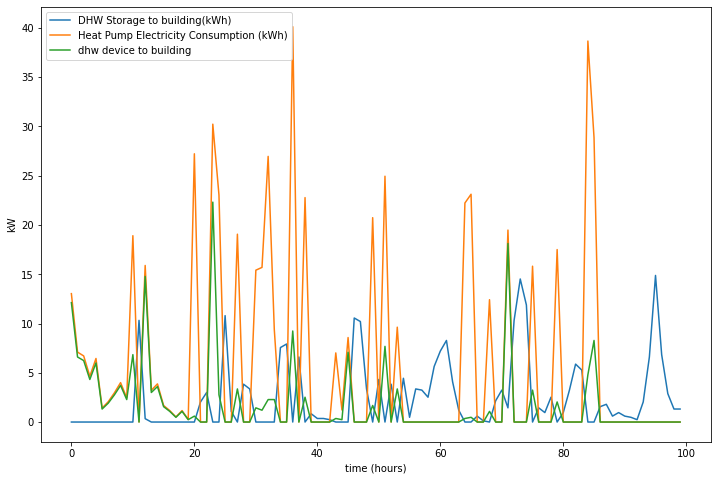

In [76]:
building_number = 'Building_8'
interval = (range(24*30*0 + 8760*0 + 800,24*30*0 + 8760*0 + 900))
plt.figure(figsize=(12,8))
plt.plot(env.buildings[building_number].dhw_storage_to_building[interval])
plt.plot(env.buildings[building_number].electric_consumption_dhw[interval])
plt.plot(env.buildings[building_number].dhw_heating_device_to_building[interval])
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['DHW Storage to building(kWh)',
            'Heat Pump Electricity Consumption (kWh)',
            'dhw device to building'
            ])

In [1]:
import numpy as np

In [11]:
np.argmax([0])

0

In [12]:
import torch
torch.argmax(torch.tensor([0]))

tensor(0)